<a href="https://colab.research.google.com/github/Rollintayi/Project_C_NN/blob/main/PE_Maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Données
x = np.array([1, 1, 1, 3, 4, 6, 0])
y = np.array([1, 2, 5, 4, 3, 2, 4])

In [ ]:
#1 Calculs statistiques
# Calculs pour les coordonnées x
mean_x = np.mean(x)
median_x = np.median(x)
var_x = np.var(x, ddof=1)  # ddof=1 pour un échantillon (variance non biaisée)
std_x = np.std(x, ddof=1)
min_x = np.min(x)
max_x = np.max(x)
range_x = max_x - min_x

# Affichage des résultats
print("------ Statistiques pour X ------")
print(f"Moyenne : {mean_x:.2f}")
print(f"Médiane : {median_x:.2f}")
print(f"Variance : {var_x:.2f}")
print(f"Écart-type : {std_x:.2f}")
print(f"Minimum: {min_x}")
print(f"Maximum : {max_x}")
print(f"Étendue : {range_x}")

# Calculs pour les coordonnées y
mean_y = np.mean(y)
median_y = np.median(y)
var_y = np.var(y, ddof=1)
std_y = np.std(y, ddof=1)
min_y = np.min(y)
max_y = np.max(y)
range_y = max_y - min_y

print("\n------ Statistiques pour Y ------")
print(f"Moyenne : {mean_y:.2f}")
print(f"Médiane : {median_y:.2f}")
print(f"Variance : {var_y:.2f}")
print(f"Écart-type : {std_y:.2f}")
print(f"Minimum : {min_y}")
print(f"Maximum: {max_y}")
print(f"Étendue : {range_y}")

------ Statistiques pour X ------
Moyenne : 2.29
Médiane : 1.00
Variance : 4.57
Écart-type : 2.14
Minimum: 0
Maximum : 6
Étendue : 6

------ Statistiques pour Y ------
Moyenne : 3.00
Médiane : 3.00
Variance : 2.00
Écart-type : 1.41
Minimum : 1
Maximum: 5
Étendue : 4


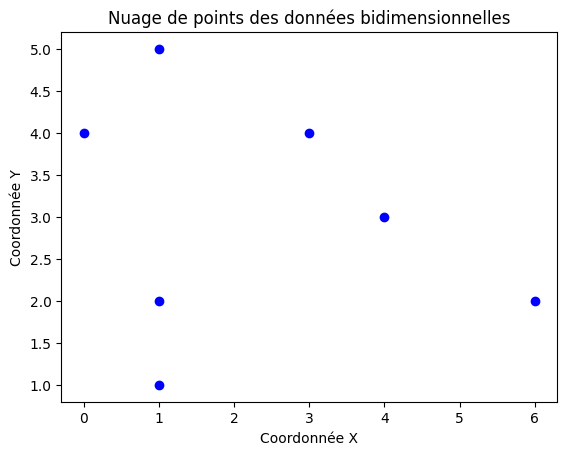

In [ ]:
#2 visualisation
plt.scatter(x, y, color='blue')
plt.title('Nuage de points des données bidimensionnelles')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.show()

# Partie 2

In [ ]:
from sklearn.linear_model import LinearRegression
new_x = x.reshape(-1, 1)
lin = LinearRegression()
lin.fit(new_x, y)
b1 = lin.coef_[0]
b0 = lin.intercept_
print("Coefficient de régression/pente (b1) :", b1)
print("Ordonnée à l'origine (b0) :", b0)

Coefficient de régression/pente (b1) : -0.14583333333333334
Ordonnée à l'origine (b0) : 3.3333333333333335




b0 représente le point de départ de la droite de regression et b1 indique la direction et l'intensité de la relation entre x et y.

Graphiquement parlant il existe plusieurs:

Cas 1: Si b1 > 0 : La droite monte donc y augmente quand x augmente.

Cas 2: Si b1 < 0 : La droite descend donc y diminue quand x augmente.

Cas 3: Si b1 = 0 : Il n' y pas de relation linéaire entre x et y.

Nous sommes dans le cas 2.

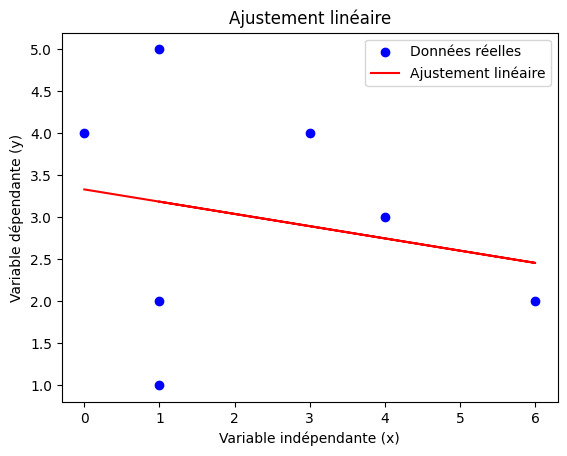

In [ ]:
import matplotlib.pyplot as plt
y_pred = lin.predict(new_x) # Prédictions pour tracer la droite

plt.scatter(new_x, y, color='blue', label='Données réelles')  # Points réels
plt.plot(new_x, y_pred, color='red', label='Ajustement linéaire')  # Droite de régression
plt.xlabel("Variable indépendante (x)")
plt.ylabel("Variable dépendante (y)")
plt.legend()
plt.title("Ajustement linéaire")
plt.show()

Superposer un nuage de points à la droite de régression permet de visualiser la qualité de l'ajustement du modèle. Cela aide à :

- Observer la tendance générale

- Vérifier s'il existe une relation entre x et y.

- Évaluer la précision : si les points sont proches de la droite, les prédictions sont fiables.

- Détecter les valeurs "anormales" qui peuvent perturber l'analyse.

# Partie 3

In [ ]:
print("Prédictions :")
for prediction in y_pred:
    print(f"{prediction:.2f}")
ecart = y - y_pred
print("\nRésidus (ecart) :")
for e in ecart:
    print(f"{e:.2f}")

Prédictions :
3.19
3.19
3.19
2.90
2.75
2.46
3.33

Résidus (ecart) :
-2.19
-1.19
1.81
1.10
0.25
-0.46
0.67


In [ ]:

SCE = np.sum((y - y_pred) ** 2)
print(f"Somme des Carrés des Erreurs (SCE) : {SCE:.2f}")

Somme des Carrés des Erreurs (SCE) : 11.42


In [ ]:
MSE = SCE / (len(x)-2)
print(f"Variance (MSE) : {MSE:.2f}")

Variance (MSE) : 2.28


" n-2 " prend en compte le fait qu'on estime deux paramètres (b0 et b1). Cela permet d'ajuster la valeur du MSE pour éviter une sous-estimation de l'erreur.

In [ ]:
s = np.sqrt(MSE)
print(f"Ecart-type : {s:.2f}")

Ecart-type : 1.51


In [ ]:
SCT = np.sum((y - mean_y) ** 2)
print(f"Somme des Carrés Total (SCT) : {SCT:.2f}")

Somme des Carrés Total (SCT) : 12.00


In [ ]:
RR = 1 - (SCE / SCT)
print(f"Coefficient de détermination (R²) : {RR:.2f}")

Coefficient de détermination (R²) : 0.05


Le modèle linéaire ne semble pas être un bon ajustement pour ces données, car :

- Nous avons obtenu une pente b1 = - 0.1458, ce qui indique une relation légèrement négative entre x et y

- R² = 0.05, ce qui signifie que seulement 5% de la variation de y est bien expliquée par x. Un R² aussi faible suggère que le modèle linéaire ne capture pas bien la tendance des données.

- Nous avons SCE = 11.42, ce qui montre que les erreurs de prédiction sont relativement élevées.

- De plus, en superposant la droite de régression aux données réelles, on peut voir que les points sont éparpillés et ne suivent pas une tendance linéaire claire.

# Partie 4

In [ ]:
SE_b1 = s / np.sqrt(np.sum((x - mean_x) ** 2))
print(f"Erreur Standard de la Pente (SE_b1) : {SE_b1:.2f}")
SE_b0 = s * np.sqrt((1 / len(x)) + (mean_x ** 2 / np.sum((x - mean_x) ** 2)))
print(f"Erreur Standard de l'ordonnée à l'origine (SE_b0) : {SE_b0:.2f}")

Erreur Standard de la Pente (SE_b1) : 0.29
Erreur Standard de l'ordonnée à l'origine (SE_b0) : 0.87


In [ ]:
import scipy.stats as stats
df = len(x) - 2  # Degrés de liberté

t1 = (b1 - 0)  / SE_b1
print(f"t1 : {t1:.2f}")
p_value_b1 = 2 * (1 - stats.t.cdf(abs(t1), df))
print(f"P-valeur pour b1 : {p_value_b1:.4f}")

t1 : -0.51
P-valeur pour b1 : 0.6347


In [ ]:
t0 = (b0 - 0) / SE_b0
print(f"t0 : {t0:.2f}")
p_value_b0 = 2 * (1 - stats.t.cdf(abs(t0), df))
print(f"P-valeur pour b0 : {p_value_b0:.4f}")

t0 : 3.82
P-valeur pour b0 : 0.0124


La statistique t suit la loi de Student, une distribution de probabilité utilisée pour les tests statistiques lorsque la variance de la population est inconnue et que l'échantillon est petit. Elle est utilisée pour évaluer la significativité statistique des coefficients dans une régression.

In [ ]:
alpha = 0.05
t_critique = stats.t.ppf(1 - alpha / 2, df)
print(f"Valeur critique de t : {t_critique:.2f}")

Valeur critique de t : 2.57


In [ ]:
inf_0 = ( b0 - t_critique ) * SE_b0
max_0 = ( b0 + t_critique ) * SE_b0
print(f"Intervalle de confiance à 95% pour b0 : [{inf_0:.2f}, {max_0:.2f}]")

Intervalle de confiance à 95% pour b0 : [0.67, 5.15]


In [ ]:
inf_1 = ( b1 - t_critique ) * SE_b1
max_1 = ( b1 + t_critique ) * SE_b1
print(f"Intervalle de confiance à 95% pour b1 : [{inf_1:.2f}, {max_1:.2f}]")

Intervalle de confiance à 95% pour b1 : [-0.78, 0.70]


La p-valeur est la probabilité d'obtenir un résultat au moins aussi extrême que celui observé si l'hypothèse nulle (H0) est vraie. Une p-valeur < seuil alpha, suggère que les données observées sont peu probables sous H0, ce qui conduit à rejeter H0 et à conclure que le coefficient est statistiquement significatif.

Bien que l'ordonnée à l'origine (b0) soit statistiquement significative car p_valeur de b0 = 0.0124 ( < 0.05), la pente (b1), qui représente la relation linéaire entre x et y, n'est pas statistiquement significative car p_valeur de b1 = 0.6347 ( > 0.05). La p-valeur élevée pour b1 et l'inclusion de zéro dans son intervalle de confiance indiquent que les données ne fournissent pas suffisamment de preuves pour conclure qu'il existe une relation linéaire significative entre les coordonnées x et y dans la population.

Un intervalle de confiance est une plage de valeurs dans laquelle on s'attend à ce que la vraie valeur du paramètre de population (b0 ou b1) se situe avec cette probabilité. Si un intervalle de confiance pour un coefficient inclut zéro, cela signifie que zéro est une valeur plausible pour ce coefficient dans la population, ce qui suggère que le coefficient n'est pas statistiquement différent de zéro au niveau de confiance donné.

Dans le cas echéant :
- L'intervalle de confiance pour b1 inclut zéro. Cela signifie que zéro est une valeur plausible pour la pente de la droite de régression dans la population.

- L'intervalle de confiance pour b0 n'inclut pas zéro, confirmant la signification statistique de b0.



# Partie 5

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#Initialisation des points
points=np.array([[1, 1], [1, 2], [1, 5], [3, 4], [4, 3], [6, 2], [0, 4]
])

#Fonctions qui calculent les distances:
#Euclidienne entre deux points
def dist_eucli(p1, p2):
    de=np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))
    return de

#Séparant deux points
def dist_1(p1, p2):
    d1=np.sum(np.abs(np.array(p1) - np.array(p2)))
    return d1

#Séparant deux points par dist infini
def dist_inf(p1, p2):
    d_inf=np.max(np.abs(np.array(p1) - np.array(p2)))
    return d_inf

#Minimale dans un tableau de point et retourne le couple de points correspondant
def dist_min(points):
    d_min = float('inf')
    p_min = (None, None)
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            d = dist_eucli(points[i], points[j])
            if d < d_min:
                d_min = d
                p_min = (i, j)
    return p_min

La distance de Ward est utilisée dans la CAH pour minimiser la variance dans un meme cluster. Elle mesure l'augmentation de l'inertie dans la classe résultant de la fusion de deux clusters.



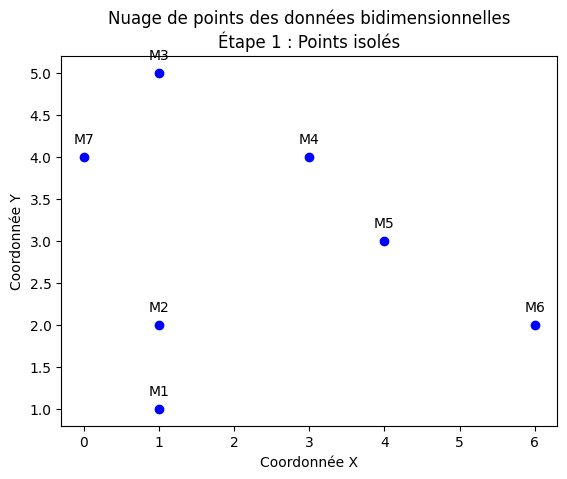

In [ ]:
#Visualisation des points isolés dans un repère orthonormé
plt.scatter(points[:, 0], points[:, 1],color='blue')
for i, txt in enumerate([f'M{i+1}' for i in range(len(points))]):
  plt.annotate(txt, (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Nuage de points des données bidimensionnelles\nÉtape 1 : Points isolés')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.show()

In [ ]:
#Matrtice de carré de la distance euclidienne des points tracés
mat_carre = np.zeros((len(points), len(points)))
for i in range(len(points)):
    for j in range(len(points)):
        mat_carre[i, j] = dist_eucli(points[i], points[j])**2

print("Matrice de distance euclidienne des points:\n",mat_carre)

Matrice de distance euclidienne des points:
 [[ 0.  1. 16. 13. 13. 26. 10.]
 [ 1.  0.  9.  8. 10. 25.  5.]
 [16.  9.  0.  5. 13. 34.  2.]
 [13.  8.  5.  0.  2. 13.  9.]
 [13. 10. 13.  2.  0.  5. 17.]
 [26. 25. 34. 13.  5.  0. 40.]
 [10.  5.  2.  9. 17. 40.  0.]]


Les points les plus proches sont M1 et M2


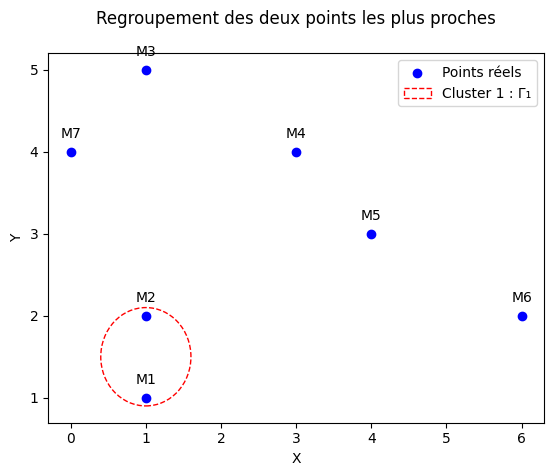

In [ ]:
# Mise en évidence des deux points les plus proches
(m, n) = dist_min(points)
print(f"Les points les plus proches sont M{m+1} et M{n+1}")

# Affichage des points
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], color='blue', label='Points réels') #Points réels

# Annoter les points
for i, txt in enumerate([f'M{i+1}' for i in range(len(points))]):
    ax.annotate(txt, (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Ajouter un cercle autour des points les plus proches
center_x = (points[m, 0] + points[n, 0]) / 2
center_y = (points[m, 1] + points[n, 1]) / 2
circle_1 = plt.Circle((center_x, center_y), 0.6, color='red', fill=False, linestyle='dashed', label='Cluster 1 : Γ₁')
ax.add_patch(circle_1)

plt.title('Regroupement des deux points les plus proches\n')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# Indices du cluster {M1, M2, M3}
gamma1_indices = [0, 1]

# Initialisation du tableau des distances
distances = np.zeros(len(points))

# Calcul des distances au plus proche voisin pour les points hors du cluster

for i in range(len(points)):
  if i not in gamma1_indices:
    d1 = dist_eucli(points[i], points[0])
    d2 = dist_eucli(points[i], points[1])
    min_dist = min(d1, d2)
    distances[i] = min_dist

# Affichage des distances
for i in range(len(points)):
  if i not in gamma1_indices:
    print(f"Distance entre M{i+1} et Γ₁: {distances[i]:.2f}")

Distance entre M3 et Γ₁: 3.00
Distance entre M4 et Γ₁: 2.83
Distance entre M5 et Γ₁: 3.16
Distance entre M6 et Γ₁: 5.00
Distance entre M7 et Γ₁: 2.24


In [ ]:
gamma_1 = points[gamma1_indices]
k=0
gamma_2 = np.zeros((5,2))

#distances
for i in range(len(points)):
  if i not in gamma1_indices:
    d1 = dist_eucli(points[i], points[0])
    d2 = dist_eucli(points[i], points[1])
    min_dist = min(d1, d2)
    gamma_2[k,0]=i+1
    gamma_2[k,1]=min_dist
    k=k+1

print("Matrice des distances Γ₂\n",gamma_2)

Matrice des distances Γ₂
 [[3.         3.        ]
 [4.         2.82842712]
 [5.         3.16227766]
 [6.         5.        ]
 [7.         2.23606798]]


In [ ]:
from scipy.cluster.hierarchy import fcluster
#Génération de la méthode de classification des points
linked=linkage(points,'ward')

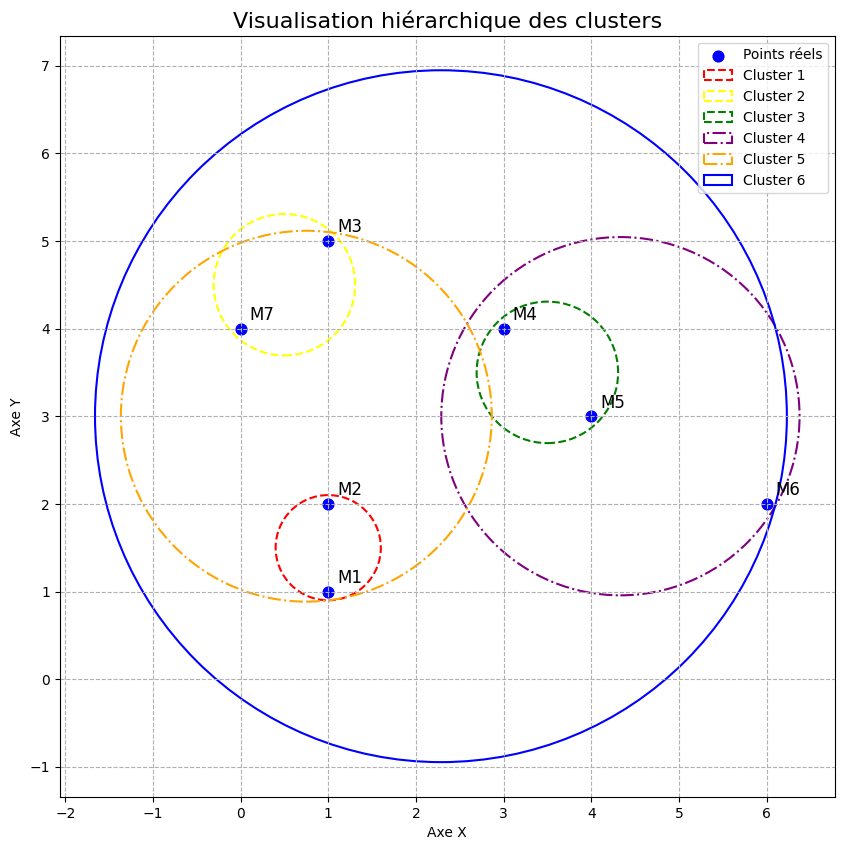

Étapes de fusion (classes fusionnées et distances) :
Étape 1: Fusion des points M1 et M2 à une distance de 1.00 - (Cluster1)
Étape 2: Fusion des points M3 et M7 à une distance de 1.41 - (Cluster2)
Étape 3: Fusion des points M4 et M5 à une distance de 1.41 - (Cluster3)
Étape 4: Fusion des points M6 et M10 à une distance de 3.37 - (Cluster4)
Étape 5: Fusion des points M8 et M9 à une distance de 4.30 - (Cluster5)
Étape 6: Fusion des points M11 et M12 à une distance de 6.64 - (Cluster6)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# --- Données ---
labels = [f'M{i+1}' for i in range(len(points))]

# --- Initialisation de l'affichage ---
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(points[:, 0], points[:, 1], s=60, c='blue', label='Points réels')

for i, label in enumerate(labels):
    ax.text(points[i, 0] + 0.1, points[i, 1] + 0.1, label, fontsize=12)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Visualisation hiérarchique des clusters', fontsize=16)
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.grid(True, linestyle='--')

# Couleurs et styles de ligne alternés
colors = ['red', 'yellow', 'green', 'purple', 'orange', 'blue']
linestyles = ['--', '--', '--', '-.', '-.', '-']
cluster_labels = []  # Stocke les noms des clusters

# --- Fusion dynamique des clusters ---
clusters = [[p] for p in points]  # Chaque point est un cluster initialement
circles = []  # Liste pour stocker les cercles affichés
step = 0  # Compteur pour changer couleur/linestyle

while len(clusters) > 1:
    # Trouver les deux clusters les plus proches
    min_dist = float('inf')
    best_pair = (None, None)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            for p1 in clusters[i]:
                for p2 in clusters[j]:
                    d = dist_eucli(p1, p2)
                    if d < min_dist:
                        min_dist = d
                        best_pair = (i, j)

    # Fusionner les clusters
    i, j = best_pair
    new_cluster = clusters[i] + clusters[j]
    clusters.pop(j)
    clusters.pop(i)
    clusters.append(new_cluster)

    # Dessiner le cercle de regroupement
    cluster_points = np.array(new_cluster)
    center = np.mean(cluster_points, axis=0)
    radius = max(dist_eucli(center, point) for point in cluster_points) + 0.1

    cluster_name = f'Cluster {step+1}'
    cluster_labels.append(cluster_name)  # Ajouter le nom du cluster

    circle = Circle(center, radius,
                    edgecolor=colors[step % len(colors)],  # Alternance des couleurs
                    facecolor='none',
                    linewidth=1.5,
                    linestyle=linestyles[step % len(linestyles)],
                    label=cluster_name)  # Ajout du label
    circles.append(circle)
    step += 1  # Incrément du compteur

# Affichage final des cercles superposés
for circle in circles:
    ax.add_patch(circle)

ax.legend(loc="upper right")  # Ajout de la légende avec position
plt.show()


print("Étapes de fusion (classes fusionnées et distances) :")
for i, (idx1, idx2, dist, sample_count) in enumerate(linked):
    print(f"Étape {i+1}: Fusion des points M{int(idx1)+1} et M{int(idx2)+1} à une distance de {dist:.2f} - (Cluster{i+1})")


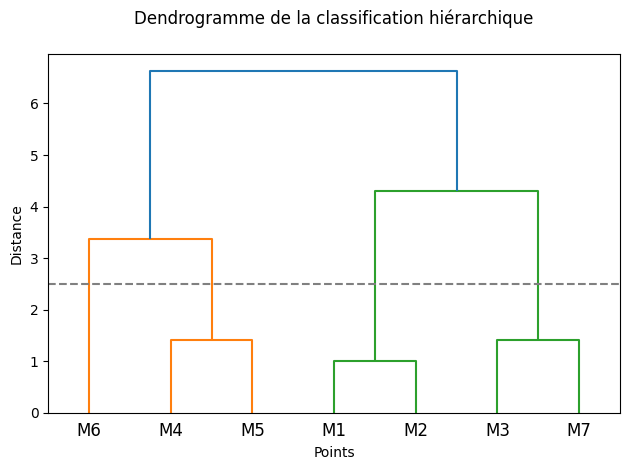

In [ ]:
dendrogram(linked, labels=[f'M{i+1}' for i in range(len(points))])
plt.title('Dendrogramme de la classification hiérarchique\n')
plt.axhline(y=2.5, color='gray', linestyle='--') #Création de la ligne en pointillé
plt.xlabel('Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

La Classification Ascendante Hiérarchique (CAH) est une méthode de clustering non supervisé utilisée en big data.
Elle permet de regrouper des individus en classes homogènes selon leurs similarités.
Chaque nœud du dendrogramme représente un regroupement.
L'objectif est d'identifier des groupes d'individus partageant des caractéristiques similaires. Ici on a obtenu 3 classes à la fin (en bleu, orange et vert)

# Partie 6

### 1. Indices d'évaluation

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist, squareform

points_data = {
    "M1": (1, 1),
    "M2": (1, 2),
    "M3": (1, 5),
    "M4": (3, 4),
    "M5": (4, 3),
    "M6": (6, 2),
    "M7": (0, 4)
}

point_names = list(points_data.keys())
X = np.array(list(points_data.values()))
print("----------------Pour {n_clusters_to_try} clusters------------------")
print("------------------Methode CAH------------------")
for n_clusters_to_try in [2,3] :
  ahc_model = AgglomerativeClustering(n_clusters=n_clusters_to_try)
  cluster_labels = ahc_model.fit_predict(X)
  ahc_model = AgglomerativeClustering(n_clusters=n_clusters_to_try)
  cluster_labels = ahc_model.fit_predict(X)
  if len(set(cluster_labels)) < 2:
    print("Indice de silhouette incalculable")
    continue
  #Calcul pour la silhouette des points d'un même cluster (Cohésion interne)
  print(f"\n--- Analyse de la cohésion interne pour {n_clusters_to_try} clusters (obtenus par CAH) ---")
  unique_cluster_labels = np.unique(cluster_labels)
  for k_label in unique_cluster_labels:
         # Isoler les points et leurs noms pour le cluster courant
        points_dans_cluster_actuel = X[cluster_labels == k_label]
        noms_points_cluster_actuel = [point_names[i] for i, label_point in enumerate(cluster_labels) if label_point == k_label]

        # Calculer la cohésion interne
        nombre_points = len(points_dans_cluster_actuel)
        if nombre_points < 2:
            cohesion_val = 0
        else:
          distances_par_paires = pdist(points_dans_cluster_actuel, metric='euclidean')
          if len(distances_par_paires) == 0:
            cohesion_val = 0.0
          else:
            cohesion_val =np.mean(distances_par_paires)

        print(f"  Cluster {k_label}:")
        print(f"    Points: {', '.join(noms_points_cluster_actuel)} ({len(points_dans_cluster_actuel)} points)")

        if len(points_dans_cluster_actuel) < 2:
            print(f"    Cohésion interne (dist. euclidienne moyenne par paires): N/A (moins de 2 points)")
        else:
            print(f"    Cohésion interne (dist. euclidienne moyenne par paires): {cohesion_val:.4f}")

  #Calcul pour la silhouette des entre différents clusters (Séparation)
  print(f"\n--- Analyse de la séparation(obtenus par CAH) ---")
  try:
         average_silhouette_score = silhouette_score(X, cluster_labels)
         print(f"\nScore de Silhouette moyen pour {n_clusters_to_try} clusters : {average_silhouette_score:.4f}")
  except ValueError as e:
         print(f"\nErreur lors du calcul du score de silhouette moyen : {e}")
  #Indice de Dunn
  n_clusters = len(unique_cluster_labels)
  if n_clusters < 2:
    dunn_val_kmeans = 0.0
  intra_cluster_diameters = []
  for k_label_val in unique_cluster_labels:
      cluster_k_points = X[cluster_labels == k_label_val]
      if len(cluster_k_points) < 2:
          intra_cluster_diameters.append(0.0)
      else:
          distances_in_cluster_k = pdist(cluster_k_points, metric='euclidean')
          if len(distances_in_cluster_k) == 0:
                intra_cluster_diameters.append(0.0)
          else:
                intra_cluster_diameters.append(np.max(distances_in_cluster_k))
  max_intra_cluster_diameter = np.max(intra_cluster_diameters)

  min_inter_cluster_distances = []
  for i in range(n_clusters):
       for j in range(i + 1, n_clusters):
              cluster_i_points = X[cluster_labels == unique_cluster_labels[i]]
              cluster_j_points = X[cluster_labels == unique_cluster_labels[j]]
              inter_cluster_dist_matrix = cdist(cluster_i_points, cluster_j_points, metric='euclidean')
              min_inter_cluster_distances.append(np.min(inter_cluster_dist_matrix))

  if not min_inter_cluster_distances:
    dunn_val_kmeans = 0.0
  min_overall_inter_cluster_distance = np.min(min_inter_cluster_distances)
  if max_intra_cluster_diameter == 0:
    if min_overall_inter_cluster_distance > 0:
      dunn_val_kmeans = np.inf
    else:
      dunn_val_kmeans = np.nan
  dunn_val_kmeans = min_overall_inter_cluster_distance / max_intra_cluster_diameter
  print(f"\nIndice de Dunn : {dunn_val_kmeans:.4f}")



----------------Pour {n_clusters_to_try} clusters------------------
------------------Methode CAH------------------

--- Analyse de la cohésion interne pour 2 clusters (obtenus par CAH) ---
  Cluster 0:
    Points: M1, M2, M3, M7 (4 points)
    Cohésion interne (dist. euclidienne moyenne par paires): 2.4688
  Cluster 1:
    Points: M4, M5, M6 (3 points)
    Cohésion interne (dist. euclidienne moyenne par paires): 2.4186

--- Analyse de la séparation(obtenus par CAH) ---

Score de Silhouette moyen pour 2 clusters : 0.3790

Indice de Dunn : 0.5590

--- Analyse de la cohésion interne pour 3 clusters (obtenus par CAH) ---
  Cluster 0:
    Points: M4, M5, M6 (3 points)
    Cohésion interne (dist. euclidienne moyenne par paires): 2.4186
  Cluster 1:
    Points: M3, M7 (2 points)
    Cohésion interne (dist. euclidienne moyenne par paires): 1.4142
  Cluster 2:
    Points: M1, M2 (2 points)
    Cohésion interne (dist. euclidienne moyenne par paires): 1.0000

--- Analyse de la séparation(obtenus

### 2. Validation croisée

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print("\n\n--- Algorithme K-Means ---")
kmeans_n_clusters_options = [2, 3]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans.fit(X)
for n_clusters in kmeans_n_clusters_options:
  print(f"\n--- K-Means avec k={n_clusters} ---")
  cluster_labels = kmeans.labels_
  silhouette_score(X, cluster_labels)
  #Score individuelle & score moyen

  if 2 <= len(np.unique(kmeans_labels)) <= len(X) - 1:
          avg_silhouette = silhouette_score(X, kmeans_labels)
          sample_silhouette_values = silhouette_samples(X, kmeans_labels)
          print(f"\nScore de Silhouette moyen : {avg_silhouette:.4f}")
          print("Scores de Silhouette individuels :")
          for i, s_val in enumerate(sample_silhouette_values):
              print(f"  {point_names[i]}: {s_val:.4f}")
  else:
          print("\nScore de Silhouette non calculable (nombre de labels invalide pour la métrique).")

  # Cohésion interne par cluster
  print("\nCohésion interne par cluster (distance euclidienne moyenne par paires) :")
  for k_label in np.unique(kmeans_labels):
    current_cluster_points = X[kmeans_labels == k_label]
    current_cluster_point_names = [point_names[i] for i, lbl in enumerate(kmeans_labels) if lbl == k_label]
    nombre_points = len(current_cluster_points)
    if nombre_points < 2:
      cohesion = 0.0
    distances_par_paires = pdist(current_cluster_points, metric='euclidean')
    if len(distances_par_paires) == 0:
      cohesion = 0.0
    else:
      cohesion = np.mean(distances_par_paires)
    print(f"  Cluster {k_label}:")
    print(f"    Points: {', '.join(current_cluster_point_names)} ({len(current_cluster_points)} points)")
    if len(current_cluster_points) < 2:
      print(f"    Cohésion interne: N/A (moins de 2 points)")
    else:
      print(f"    Cohésion interne: {cohesion:.4f}")

  # Index de Dunn
  unique_labels = np.unique(kmeans_labels)
  n_clusters = len(unique_labels)
  if n_clusters < 2:
    dunn_val_kmeans = 0.0
  intra_cluster_diameters = []
  for k_label_val in unique_labels:
      cluster_k_points = X[kmeans_labels == k_label_val]
      if len(cluster_k_points) < 2:
          intra_cluster_diameters.append(0.0)
      else:
          distances_in_cluster_k = pdist(cluster_k_points, metric='euclidean')
          if len(distances_in_cluster_k) == 0:
                intra_cluster_diameters.append(0.0)
          else:
                intra_cluster_diameters.append(np.max(distances_in_cluster_k))
  max_intra_cluster_diameter = np.max(intra_cluster_diameters)

  min_inter_cluster_distances = []
  for i in range(n_clusters):
      for j in range(i + 1, n_clusters):
              cluster_i_points = X[kmeans_labels == unique_labels[i]]
              cluster_j_points = X[kmeans_labels == unique_labels[j]]
              inter_cluster_dist_matrix = cdist(cluster_i_points, cluster_j_points, metric='euclidean')
              min_inter_cluster_distances.append(np.min(inter_cluster_dist_matrix))

  if not min_inter_cluster_distances:
    dunn_val_kmeans = 0.0
  min_overall_inter_cluster_distance = np.min(min_inter_cluster_distances)
  if max_intra_cluster_diameter == 0:
    if min_overall_inter_cluster_distance > 0:
      dunn_val_kmeans = np.inf
    else:
      dunn_val_kmeans = np.nan
  dunn_val_kmeans = min_overall_inter_cluster_distance / max_intra_cluster_diameter
  print(f"\nIndice de Dunn : {dunn_val_kmeans:.4f}")




--- Algorithme K-Means ---

--- K-Means avec k=2 ---

Score de Silhouette moyen : 0.4763
Scores de Silhouette individuels :
  M1: 0.7208
  M2: 0.6180
  M3: 0.5959
  M4: 0.0413
  M5: 0.4606
  M6: 0.4216
  M7: 0.4761

Cohésion interne par cluster (distance euclidienne moyenne par paires) :
  Cluster 0:
    Points: M4, M5, M6 (3 points)
    Cohésion interne: 2.4186
  Cluster 1:
    Points: M1, M2 (2 points)
    Cohésion interne: 1.0000
  Cluster 2:
    Points: M3, M7 (2 points)
    Cohésion interne: 1.4142

Indice de Dunn : 0.6202

--- K-Means avec k=3 ---

Score de Silhouette moyen : 0.4763
Scores de Silhouette individuels :
  M1: 0.7208
  M2: 0.6180
  M3: 0.5959
  M4: 0.0413
  M5: 0.4606
  M6: 0.4216
  M7: 0.4761

Cohésion interne par cluster (distance euclidienne moyenne par paires) :
  Cluster 0:
    Points: M4, M5, M6 (3 points)
    Cohésion interne: 2.4186
  Cluster 1:
    Points: M1, M2 (2 points)
    Cohésion interne: 1.0000
  Cluster 2:
    Points: M3, M7 (2 points)
    Cohésio

### 3. Interprétation des résultats

In [ ]:
# --- Analyse avec Pandas ---
import pandas as pd
# 1. Créer le DataFrame
df = pd.DataFrame(X, columns=['Coord_X', 'Coord_Y'], index=point_names)
df['Cluster'] = kmeans_labels

# 2. Utiliser groupby() et describe()
description_par_cluster = df.groupby('Cluster').describe()

print(description_par_cluster)

        Coord_X                                                Coord_Y       \
          count      mean       std  min   25%  50%   75%  max   count mean   
Cluster                                                                       
0           3.0  4.333333  1.527525  3.0  3.50  4.0  5.00  6.0     3.0  3.0   
1           2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0     2.0  1.5   
2           2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0     2.0  4.5   

                                              
              std  min   25%  50%   75%  max  
Cluster                                       
0        1.000000  2.0  2.50  3.0  3.50  4.0  
1        0.707107  1.0  1.25  1.5  1.75  2.0  
2        0.707107  4.0  4.25  4.5  4.75  5.0  


### 4. Analyse critique de la méthode

# 13. Visualisation avancée

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
housing = pd.read_excel('/content/drive/MyDrive/tp_IA/Projet_Electif/Data_PE_2025-CSI3_CIR3.xlsx')
print(type(housing))
df = housing.copy()
name_column = df.columns[0]
print(f"La colonne des noms a été identifiée comme : '{name_column}'")
point_names = df[name_column].values
df = df.iloc[1:].reset_index(drop=True)
features = df.drop(name_column, axis=1)

<class 'pandas.core.frame.DataFrame'>
La colonne des noms a été identifiée comme : 'Unnamed: 0'



Clustering K-Means effectué, 3 groupes trouvés.


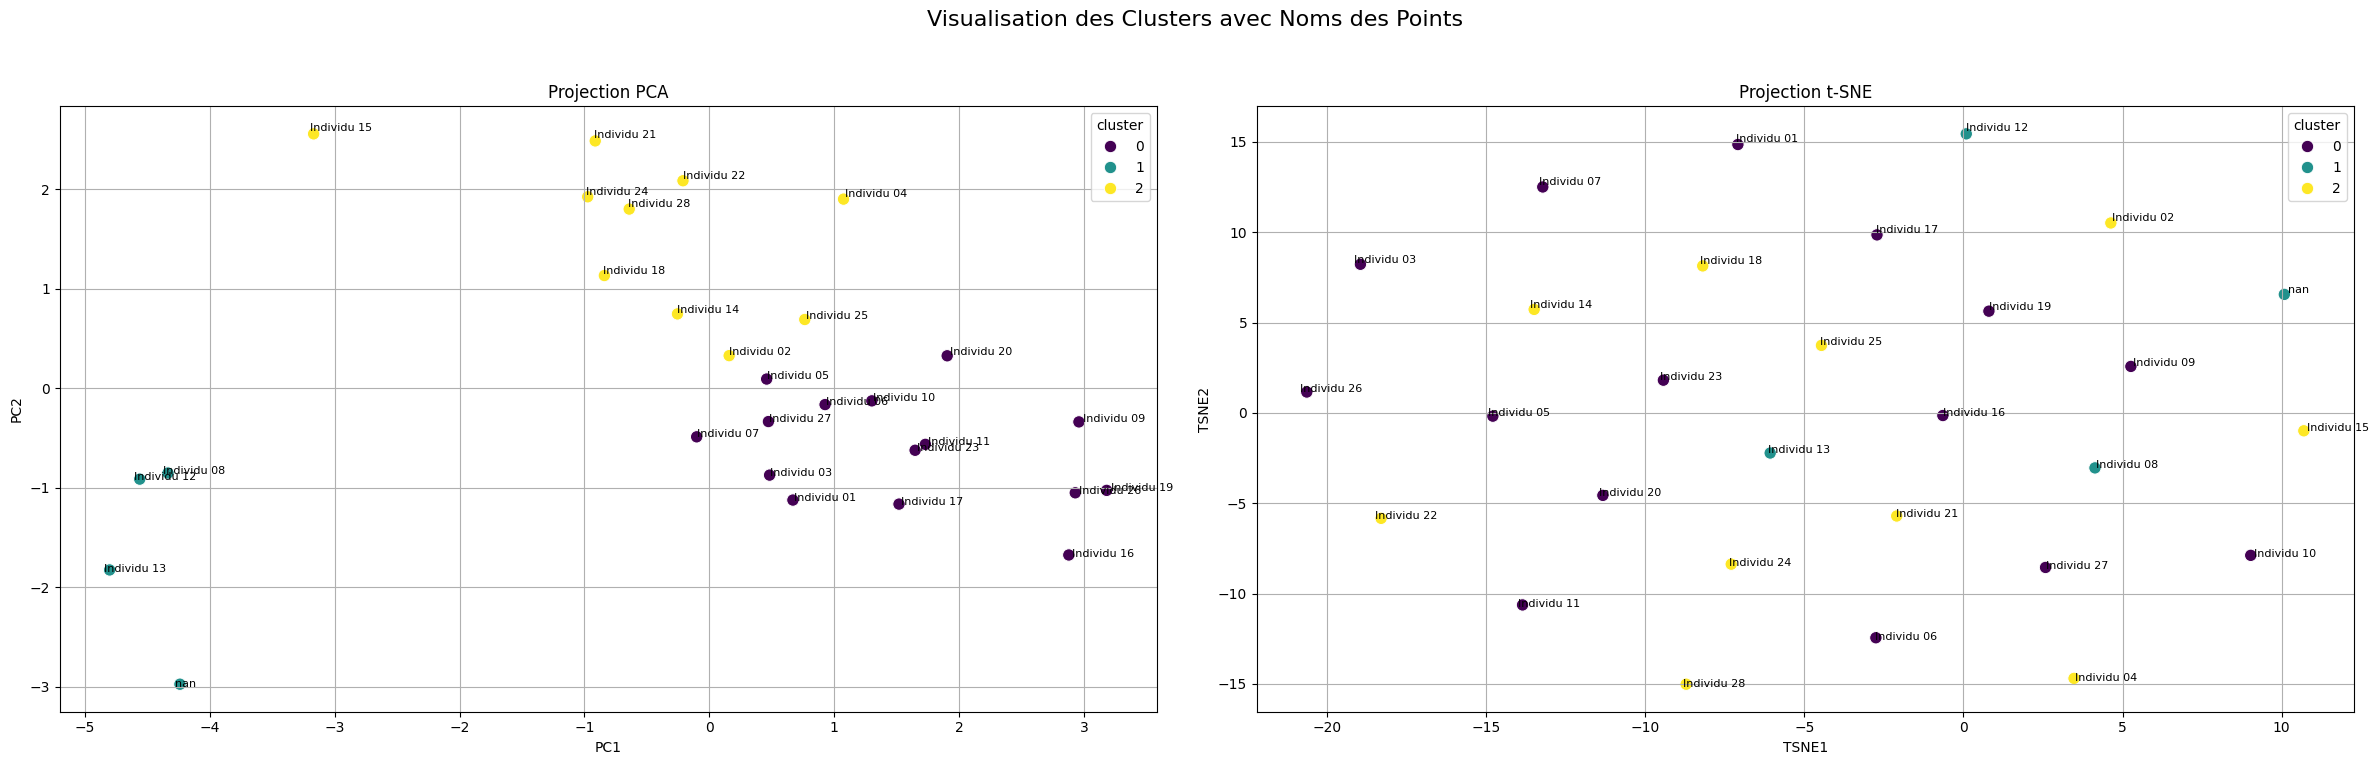

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Nous utilisons 3 clusters pour l'exemple, à adapter si besoin
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
print(f"\nClustering K-Means effectué, {len(np.unique(cluster_labels))} groupes trouvés.")

# --- 3. APPLICATION DES PROJECTIONS ---
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = cluster_labels

# t-SNE
# Ajuster la perplexité si le nombre de points est faible
perplexity_value = min(28, len(df) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = cluster_labels

# --- 4. CRÉATION DES GRAPHIQUES AVEC ÉTIQUETTES DE TEXTE ---
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('Visualisation des Clusters avec Noms des Points', fontsize=16)
plots = {'PCA': df_pca, 't-SNE': df_tsne}
plot_index = 0

for title, df_proj in plots.items():
    ax = axes[plot_index]
    cols = df_proj.columns

    # Nuage de points
    sns.scatterplot(ax=ax, data=df_proj, x=cols[0], y=cols[1], hue='cluster', palette='viridis', s=80, legend='full')
    ax.set_title(f'Projection {title}')
    ax.grid(True)

    # Ajout des noms de chaque point
    for i in range(len(df_proj)):
        ax.text(
            x=df_proj[cols[0]][i] * 1.01, # Petit décalage pour la lisibilité
            y=df_proj[cols[1]][i] * 1.01,
            s=point_names[i],
            fontdict=dict(color='black', size=8)
        )
    plot_index += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

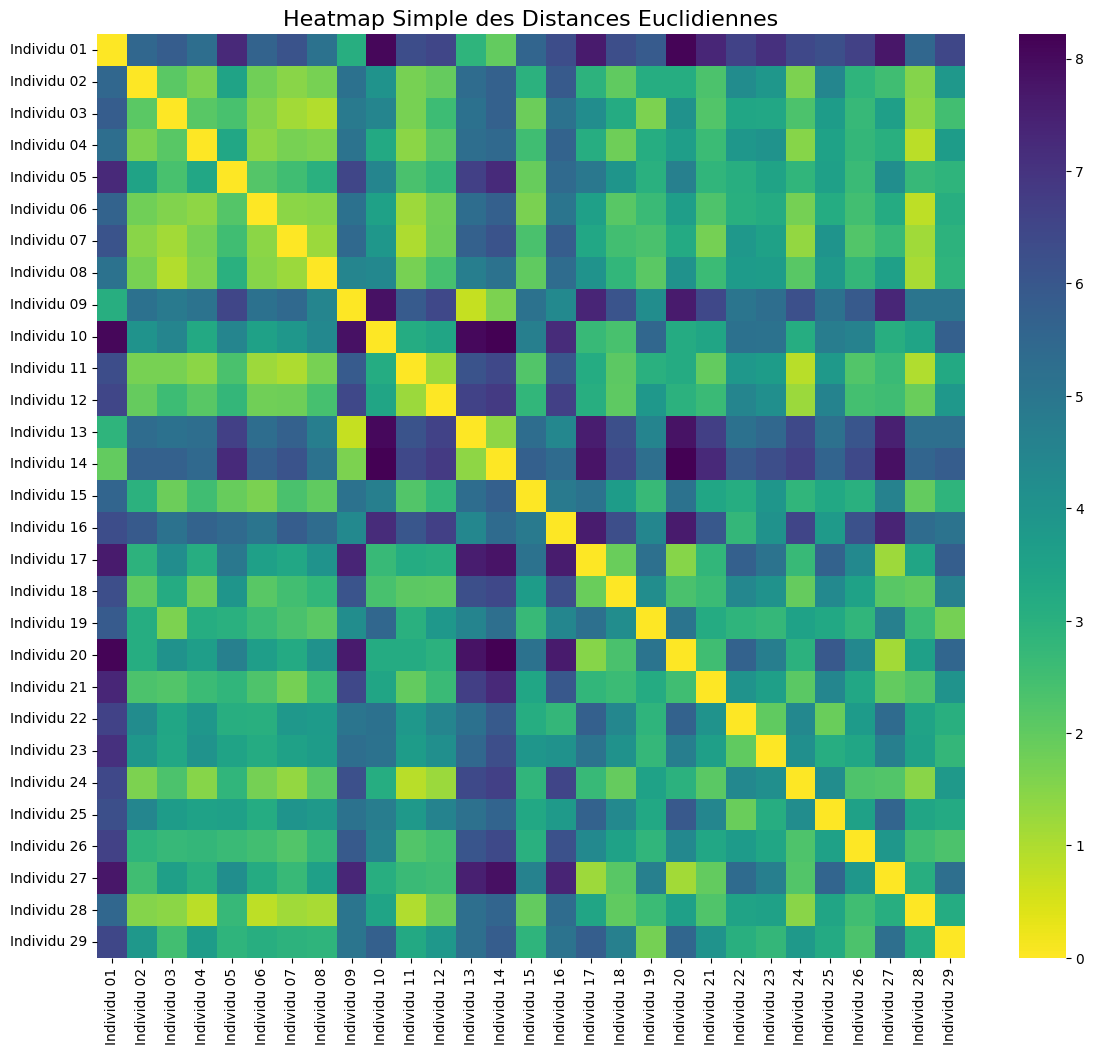

In [ ]:
# --------  HEATMAP  ---------
point_names_for_heatmap = housing.iloc[1:][name_column].values
distance_matrix = squareform(pdist(X_scaled, metric='euclidean'))
df_dist = pd.DataFrame(distance_matrix, index=point_names_for_heatmap, columns=point_names_for_heatmap)
plt.figure(figsize=(14, 12))
# cmap='viridis_r' : _r pour "reversed", les petites distances (proximité) seront sombres/violettes
sns.heatmap(df_dist, cmap='viridis_r', annot=False) # annot=True pour afficher les valeurs, mais peut être illisible
plt.title('Heatmap Simple des Distances Euclidiennes', fontsize=16)
plt.show()

Calcul du clustering hiérarchique avec la méthode de Ward...
Génération du dendrogramme...


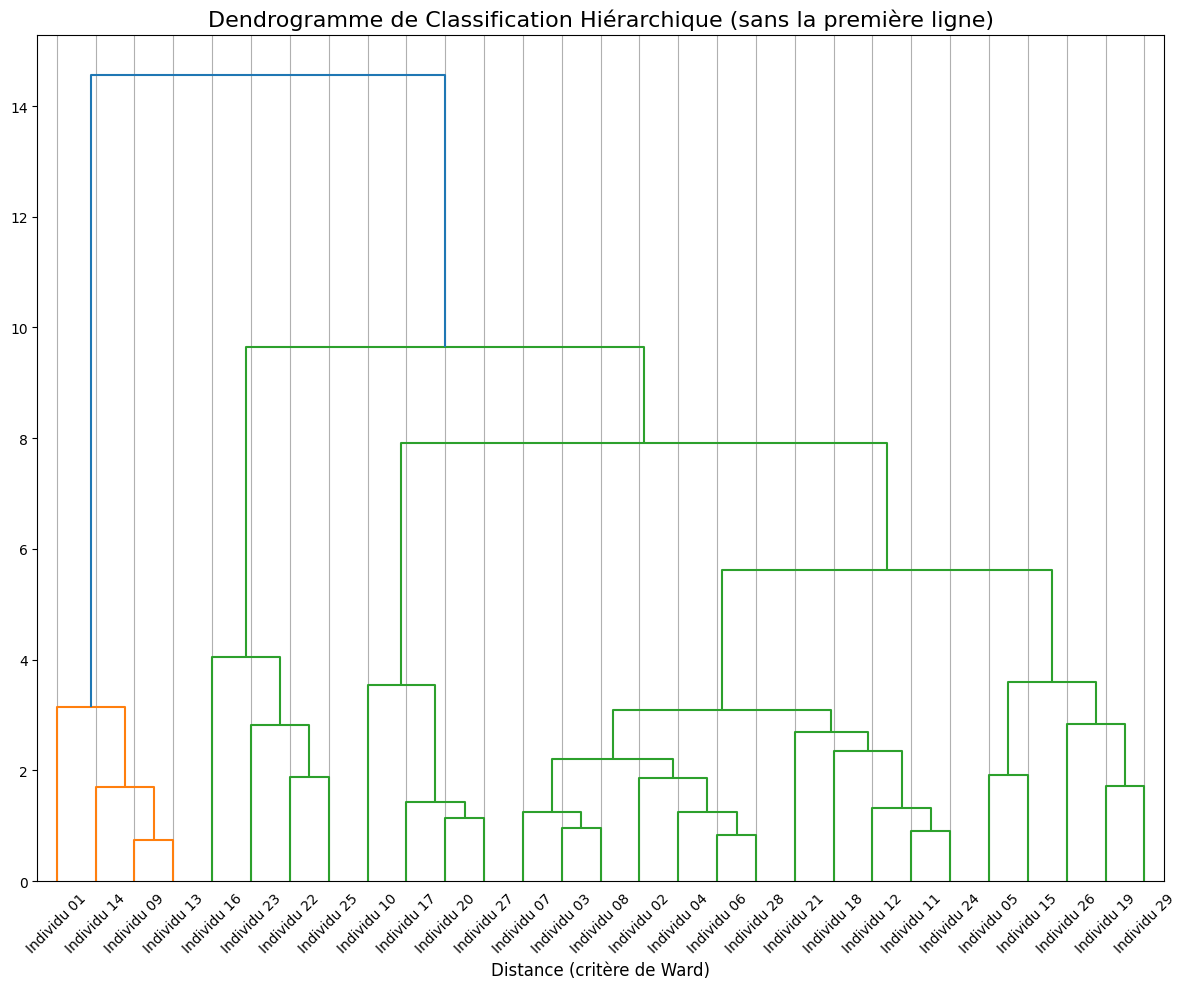

In [ ]:
# ----------- METHODE WARD ---------
from scipy.cluster.hierarchy import dendrogram, linkage
print("Calcul du clustering hiérarchique avec la méthode de Ward...")
Z = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(12, 10)) # Créer une figure plus grande pour la lisibilité

print("Génération du dendrogramme...")
dendrogram(
    Z,
    labels=point_names_for_heatmap,
    leaf_font_size=10,

    # --- Pour la coloration des clusters (facultatif mais recommandé) ---
    # color_threshold=7 # Décommentez et ajustez cette valeur pour colorer les clusters
    # 'color_threshold' colore tous les liens en dessous d'une certaine distance de fusion.
    # C'est une manière de "couper" l'arbre à une certaine hauteur pour voir les clusters.
)

plt.title('Dendrogramme de Classification Hiérarchique (sans la première ligne)', fontsize=16)
plt.xlabel('Distance (critère de Ward)', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()